## Battle Of Neighborhoods - IBM Data Science Professioal Capstone
## Recommend a location for Thai Resturant

### Introduction 

An entrepreneur needs to open a new thai restaurant in Manhattan, New York City.The businessman is not sure which is the best location to open such resturant. He thus hires datascience professional company for which I am an employee and will work on analyzing and recommending the best location for Thai restaurant. 

In [2]:
## Import Required Libraries

In [1]:
# Import all the necessary libraries
import numpy as np 
import pandas as pd
import json # for JSON files
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values
import requests 
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#Import Seaborn Library
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')


Libraries imported.


#### Download the NewYork City data from https://cocl.us/new_york_dataset
#### It is usually downloaded as nyu_2451_34572-geojason.json. Saved it as 'newyork.json'

In [3]:
with open('newyork.json') as json_data:
    nydata = json.load(json_data)
nydata

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
nyneighborhoods_data= nydata['features']

### Transform the data from json to Pandas Data Frame

We will create and label the column names and assign the columns to empty data frame. This will be followed by loading the data from dictionary into pandas dataframe. 

In [5]:
# define the pandas dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# Assign columns to a empty dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in nyneighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

#### Lets check howmany neighborhoods are there in the dataset

In [7]:
neighborhoods.shape

(306, 4)

#### Lets check the dataframe by listing top 5 rows

In [8]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Create a Bar Plot to visualize different neighborhoods in New York City.

[Text(0, 0, 'Bronx'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island')]

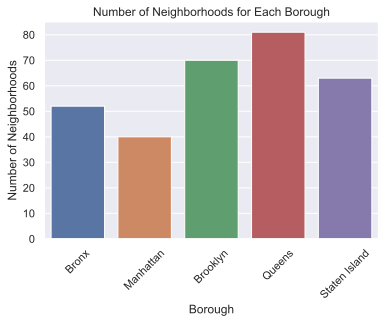

In [9]:
sns.set(style="darkgrid")
ax1 = sns.countplot(x="Borough", data=neighborhoods)
ax1.set(xlabel="Borough", ylabel = "Number of Neighborhoods")
ax1.set_title('Number of Neighborhoods for Each Borough')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

### Get Geographical Coordinates of Newyork city

In [10]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Create a new data frame, filtering out only Manhattan Data

In [12]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


#### Let's get the geographical coordinates of Manhattan.

In [13]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_manhattan= location.latitude
longitude_manhattan = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7127281, -74.0060152.


## As we did with all of New York City, let's visualizat Manhattan and its Neighborhoods

In [14]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ffff00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

#### Now, let's get the top 100 venues that are in Manhattan within a radius of 500 meters.

In [15]:
neighborhood_latitude = latitude_manhattan # neighborhood latitude value
neighborhood_longitude = longitude_manhattan # neighborhood longitude value

neighborhood_name = 'Manhattan' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Manhattan are 40.7896239, -73.9598939.


### Create the URL within 500m radius

In [17]:
# type your answer here
CLIENT_ID = 'Z304X0LX3RADWJEY2X4OVLIYM1EHXPAMOQWZWOU0LAJBNKGF' # Foursquare ID
CLIENT_SECRET = 'GYYPDPOEVYSATQGH5GZUE5EAO3S1TCA5CSVCQ01W0ZODNSG3' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=Z304X0LX3RADWJEY2X4OVLIYM1EHXPAMOQWZWOU0LAJBNKGF&client_secret=GYYPDPOEVYSATQGH5GZUE5EAO3S1TCA5CSVCQ01W0ZODNSG3&v=20180605&ll=40.7896239,-73.9598939&radius=500&limit=100'

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f53f447d04dfc25daa5c788'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Park',
  'headerFullLocation': 'Central Park, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 40.794123904500005,
    'lng': -73.95396136384342},
   'sw': {'lat': 40.7851238955, 'lng': -73.96582643615658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a78425df964a52053e51fe3',
       'name': 'Central Park Tennis Center',
       'location': {'address': 'Central Park West at 96th St',
        'lat': 40.78931319964619,
        'lng': -73.96186241658044,
        'labeledLatLngs': [{'label': 'disp

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Central Park Tennis Center,Tennis Court,40.789313,-73.961862
1,North Meadow,Park,40.792027,-73.959853
2,East Meadow,Field,40.790160,-73.955498
3,Central Park - North Meadow Recreation Center,Playground,40.790939,-73.960304
4,Central Park - Woodman's Gate,Park,40.787786,-73.955924


# Explore the Neighborhood of Manhattan

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


### Lets get the Category id of Thai Resturants by searching with in radius of 500 meters 

In [23]:
CLIENT_ID = 'Z304X0LX3RADWJEY2X4OVLIYM1EHXPAMOQWZWOU0LAJBNKGF' 
CLIENT_SECRET = 'GYYPDPOEVYSATQGH5GZUE5EAO3S1TCA5CSVCQ01W0ZODNSG3'
VERSION = '20200501'
LIMIT=100

In [24]:
# Search Thai Restaurants within 500 meters
search_query = 'Thai'
radius = 500

In [25]:
# Get the URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}\
&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,\
                                                                    latitude, longitude, VERSION, search_query, radius, LIMIT)

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f53f5d2fa0ba4415144485d'},
 'response': {'venues': [{'id': '500fff77e4b05bbeac81f313',
    'name': 'Muay Thai MMA Square Circle New York',
    'location': {'address': '139 Fulton St',
     'crossStreet': 'Broadway',
     'lat': 40.71054926259554,
     'lng': -74.0075482585511,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.71054926259554,
       'lng': -74.0075482585511},
      {'label': 'entrance', 'lat': 40.710372, 'lng': -74.007859}],
     'distance': 274,
     'postalCode': '10038',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['139 Fulton St (Broadway)',
      'New York, NY 10038',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d101941735',
      'name': 'Martial Arts School',
      'pluralName': 'Martial Arts Schools',
      'shortName': 'Martial Arts',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martiala

### As can be seen that the Category_ID of most Thai restaurants is 4bf58dd8d48988d149941735 . We will create the URL using this id

In [27]:
LIMIT = 100
radius = 500
categoryId = '4bf58dd8d48988d149941735'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,  radius, LIMIT,categoryId)


In [28]:
def getNearbyLoc(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION,  radius, LIMIT,categoryId)

        
        results = requests.get(url).json()["response"]['venues']
        
        venues_list.append([(
            name,
            v['id'],
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories'][0]['name'])for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Id',          
                  'Name', 
                  'Latitude', 
                  'Longitude',
                  'Category']
    
    return(nearby_venues)

In [29]:
manhattan_neigh_loc = getNearbyLoc(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [30]:
manhattan_neigh_loc.head()

,Neighborhood,Id,Name,Latitude,Longitude,Category
0,Marble Hill,4a739e29f964a520f5dc1fe3,Siam Square,40.878796,-73.916701,Thai Restaurant
1,Chinatown,5bbea2ad9411f2002c2c8562,Noree Thai Bazaar,40.717900,-73.992966,Thai Restaurant
2,Chinatown,5cc4e9d0c876c8002c3010cb,Wayla,40.718291,-73.992584,Thai Restaurant
3,Chinatown,598b97d559fe5c1d37565107,Jia,40.715454,-73.990036,Thai Restaurant
4,Chinatown,57e0890e498ed6d471c6fe92,Thailicious NYC,40.716310,-73.999944,Thai Restaurant


### Lets plot the nearby locations of manhattan based on above crieteria

In [96]:
# create map of Manhattan using latitude and longitude values
map_manhattan_loc = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_neigh_loc['Latitude'],manhattan_neigh_loc['Longitude'], manhattan_neigh_loc['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#08f26e',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_loc)  
    
map_manhattan_loc

### Find neighborhoods having most Thai restaurants

In [32]:
thai_rest_neigh=manhattan_neigh_loc[['Id','Neighborhood']].groupby('Neighborhood').count()
thai_rest_neigh = thai_rest_neigh.sort_values(by=['Id'], ascending=False)
thai_rest_neigh.reset_index(inplace=True)
thai_rest_neigh.columns = ['Neighborhood','count']
thai_rest_neigh

,Neighborhood,count
0,Noho,25
1,East Village,24
2,Murray Hill,17
3,Clinton,16
4,Chinatown,15
5,Flatiron,15
6,Little Italy,14
7,Tudor City,12
8,Yorkville,11
9,Turtle Bay,10


### KMeans clustering

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [35]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


## Data Processing and Clustering Block

In [36]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Group the data by Neighborhood Mean
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [38]:
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.015385,0.0,0.000000,0.000000
1,Carnegie Hill,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.011236,0.000000,...,0.0,0.011236,0.0,0.0,0.0,0.011236,0.033708,0.0,0.011236,0.033708
2,Central Harlem,0.0,0.0,0.0,0.068182,0.045455,0.0,0.00,0.000000,0.022727,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,Chelsea,0.0,0.0,0.0,0.000000,0.040000,0.0,0.01,0.000000,0.040000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.010000,0.0,0.010000,0.000000
4,Chinatown,0.0,0.0,0.0,0.000000,0.030000,0.0,0.00,0.000000,0.000000,...,0.0,0.030000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


### Common Venues

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Segregate top 10 venues

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Coffee Shop,Memorial Site,Gourmet Shop,Playground,Plaza,Burger Joint,Food Court
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Bookstore,Gym / Fitness Center,Gym,Italian Restaurant,French Restaurant,Cosmetics Shop,Pizza Place
2,Central Harlem,African Restaurant,Bar,Chinese Restaurant,Seafood Restaurant,American Restaurant,Fried Chicken Joint,Cosmetics Shop,French Restaurant,Gym,Dessert Shop
3,Chelsea,Coffee Shop,American Restaurant,Art Gallery,Bakery,Italian Restaurant,Ice Cream Shop,French Restaurant,Theater,Bookstore,Market
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Dessert Shop,American Restaurant,Optical Shop,Vietnamese Restaurant,Noodle House,Spa,Hotpot Restaurant


In [41]:
# Create 5 Clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 1, 1, 1, 1, 1, 3, 0, 1])

### Merge the data with KMeans Lables

In [63]:
manhattan_merged = manhattan_data

# add clustering labels
manhattan_merged['Cluster_Labels'] = kmeans.labels_

# merge manhattan_merged with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,3,Coffee Shop,Gym,Discount Store,Sandwich Place,Yoga Studio,Ice Cream Shop,Deli / Bodega,Pharmacy,Department Store,Diner
1,Manhattan,Chinatown,40.715618,-73.994279,0,0,Chinese Restaurant,Bakery,Cocktail Bar,Dessert Shop,American Restaurant,Optical Shop,Vietnamese Restaurant,Noodle House,Spa,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,1,1,Café,Bakery,Deli / Bodega,Chinese Restaurant,Mobile Phone Shop,Grocery Store,Spanish Restaurant,Supplement Shop,Tapas Restaurant,Sandwich Place
3,Manhattan,Inwood,40.867684,-73.921210,1,1,Mexican Restaurant,Restaurant,Café,Lounge,Spanish Restaurant,Bakery,Park,Pizza Place,Chinese Restaurant,Caribbean Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,1,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Yoga Studio,Sushi Restaurant,Caribbean Restaurant,School,Chinese Restaurant,Sandwich Place


## Add Cluster to Data Frame

In [65]:
manhattan_clusters=manhattan_merged[['Neighborhood','Cluster_Labels']]
manhattan_clusters.head(10)

,Neighborhood,Cluster_Labels
0,Marble Hill,3
1,Chinatown,0
2,Washington Heights,1
3,Inwood,1
4,Hamilton Heights,1
5,Manhattanville,1
6,Central Harlem,1
7,East Harlem,3
8,Upper East Side,0
9,Yorkville,1


### Disaply Thai Restaurants Neighborhood

In [66]:
thai_rest_neigh

,Neighborhood,count
0,Noho,25
1,East Village,24
2,Murray Hill,17
3,Clinton,16
4,Chinatown,15
5,Flatiron,15
6,Little Italy,14
7,Tudor City,12
8,Yorkville,11
9,Turtle Bay,10


In [67]:
# Merging clusters
thai_rest_cluster = pd.merge(thai_rest_neigh,manhattan_clusters,how='inner',on='Neighborhood')

In [68]:
thai_rest_cluster

,Neighborhood,count,Cluster_Labels
0,Noho,25,0
1,East Village,24,3
2,Murray Hill,17,0
3,Clinton,16,1
4,Chinatown,15,0
5,Flatiron,15,0
6,Little Italy,14,1
7,Tudor City,12,0
8,Yorkville,11,1
9,Turtle Bay,10,0


In [69]:
neigh_thai_rest = thai_rest_cluster[['Neighborhood','Cluster_Labels']].groupby('Cluster_Labels').count() 

In [88]:
neigh_thai_rest

,Neighborhood
Cluster_Labels,
0,16
1,9
2,1
3,8
4,1


Text(0.5, 1.0, 'Avg of Thai Restaurants Per Cluster')

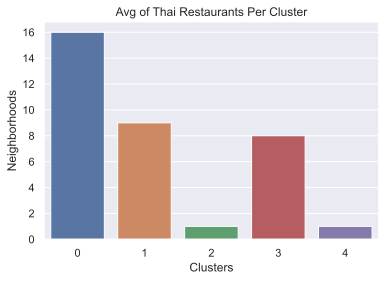

In [92]:
sns.set(style="darkgrid")
ax2= sns.barplot(x="Cluster_Labels", y="Neighborhood", data=neigh_thai_rest.reset_index())
ax2.set(xlabel="Clusters", ylabel = "Neighborhoods")
ax2.set_title('Avg of Thai Restaurants Per Cluster')

#### Conclusion

Most of the Thai Restaurants are in cluster 0 represented by the Blue cluster.
Looking at the nearby clusters, the optimum place to put a new Thai Restaurant is Cluster 2 or 4 
because other clusters are already saturated with lots of thai restaurants 

In [94]:
#list all the neighborhoods in cluster 4
neigh_suited_for_opening_res = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]
neigh_suited_for_opening_res['Neighborhood']

24    West Village
Name: Neighborhood, dtype: object

In [95]:
#list all the neighborhoods in cluster 2
neigh_suited_for_opening_res = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]
neigh_suited_for_opening_res['Neighborhood']

30    Carnegie Hill
Name: Neighborhood, dtype: object

### West Village and Carnegie are  thus a suitable places to open Thai Restaurant. 